<a href="https://colab.research.google.com/github/kamjelonek/Project_2_CLASS/blob/main/driver_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score, matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from sklearn.manifold import TSNE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.preprocessing import StandardScaler
from mlxtend import plotting
from sklearn.metrics import roc_auc_score, roc_curve

In [72]:
def Plot_3D(X,y,a,b,c,tit):

  X_show = np.array(X)
  y_show = np.array(y)

  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)
  ax = plt.axes(projection='3d')
  ax.scatter3D(X_show[:, a], X_show[:, b], X_show[:, c],c=y_show, edgecolor="k")
  ax.set_title(tit)
  return plt.show()

def Feature_2D(X,y,tit):

  model_tsne = TSNE(n_components=2)

  X_show = np.array(X)
  y_show = np.array(y)

  X_tse=model_tsne.fit_transform(X_show)

  x1=X_tse[:,0]
  x2=X_tse[:,1]

  plt.figure(figsize=(8,8))
  plt.scatter(x1,x2,c=y_show)
  plt.title(tit)
  plt.show()

def Matrix_Curve(model,X,y,model_name,matrix):

  train_sizes, train_scores, test_scores = learning_curve(model,X,y,
                                                          cv=10, scoring='f1_macro',
                                                          train_sizes=np.linspace(0.01, 1.0, 10))

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

  sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', ax=ax1,
              xticklabels=["Positive","Negative"],
              yticklabels=["Positive","Negative"])
  ax1.set_title(f"Confusion Matrix for {str(model_name)}")

  ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
  ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
  ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
  ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
  ax2.set_title(f'Learning Curve for ({str(model_name)})')
  ax2.set_xlabel('Number of Training Examples')
  ax2.set_ylabel('Accuracy')
  ax2.legend(loc='lower right')
  ax2.grid(True)

  plt.show()

In [7]:
df = pd.read_csv('acquiredDataset.csv')
df.head()

# Attenction - Proprietary measure of mental focus from 0-100
# meditation - Proprietary measure of calmness from 0-100
# delta - 1-3 Hz of power spectrum
# theta - 4-7 Hz of power spectrum
# lowAlpha - Lower 8-11 Hz of power spectrum
# highAlpha - Higher 8-11 Hz of power spectrum
# lowBeta - Lower 12-29 Hz of power spectrum
# highBeta - Higher 12-29 Hz of power spectrum
# lowGamma - Lower 30-100 Hz of power spectrum
# highGamma - Higher 30-100 Hz of power spectrum
# classification - (0-sleepy/1-awake?)

attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0

In [8]:
df.shape

(3735, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [10]:
df['classification'].unique()

array([0, 1])

In [11]:
print('Duplicate rows:')
print(df.duplicated().sum())

Duplicate rows:
0


In [12]:
df.nunique()


attention           60
meditation          60
delta             3724
theta             3680
lowAlpha          3601
highAlpha         3561
lowBeta           3573
highBeta          3494
lowGamma          3259
highGamma         3651
classification       2
dtype: int64

In [13]:
nany = df.isna().sum()
print("Liczba brakujących wartości:")
print(nany)

Liczba brakujących wartości:
attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64


In [14]:
df.corr()

attention  meditation     delta     theta  lowAlpha  \
attention        1.000000    0.012465 -0.142241 -0.053082 -0.051414   
meditation       0.012465    1.000000 -0.075071 -0.081029  0.159976   
delta           -0.142241   -0.075071  1.000000  0.380921  0.363079   
theta           -0.053082   -0.081029  0.380921  1.000000  0.456296   
lowAlpha        -0.051414    0.159976  0.363079  0.456296  1.000000   
highAlpha        0.047367    0.015013  0.257987  0.656068  0.256059   
lowBeta          0.006725    0.009094  0.349557  0.344237  0.693183   
highBeta         0.166178    0.027394  0.225820  0.663608  0.437718   
lowGamma         0.059002   -0.097699  0.253741  0.285673  0.294094   
highGamma        0.032169    0.166853  0.287873  0.594448  0.444335   
classification   0.049283   -0.057642 -0.229921 -0.205588 -0.174786   

                highAlpha   lowBeta  highBeta  lowGamma  highGamma  \
attention        0.047367  0.006725  0.166178  0.059002   0.032169   
meditation       0.015013  0.009094  0.027394 -0.097699   0.166853   
delta            0.257987  0.349557  0.225820  0.253741   0.287873   
theta            0.656068  0.344237  0.663608  0.285673   0.594448   
lowAlpha         0.256059  0.693183  0.437718  0.294094   0.444335   
highAlpha        1.000000  0.271657  0.632582  0.281427   0.469033   
lowBeta          0.271657  1.000000  0.199992  0.403545   0.182727   
highBeta         0.632582  0.199992  1.000000  0.301577   0.650842   
lowGamma         0.281427  0.403545  0.301577  1.000000   0.027007   
highGamma        0.469033  0.182727  0.650842  0.027007   1.000000   
classification  -0.190926 -0.063340 -0.213560 -0.049076  -0.103819   

                classification  
attention             0.049283  
meditation           -0.057642  
delta                -0.229921  
theta                -0.205588  
lowAlpha             -0.174786  
highAlpha            -0.190926  
lowBeta              -0.063340  
highBeta             -0.213560  
lowGamma             -0.049076  
highGamma            -0.103819  
classification        1.000000

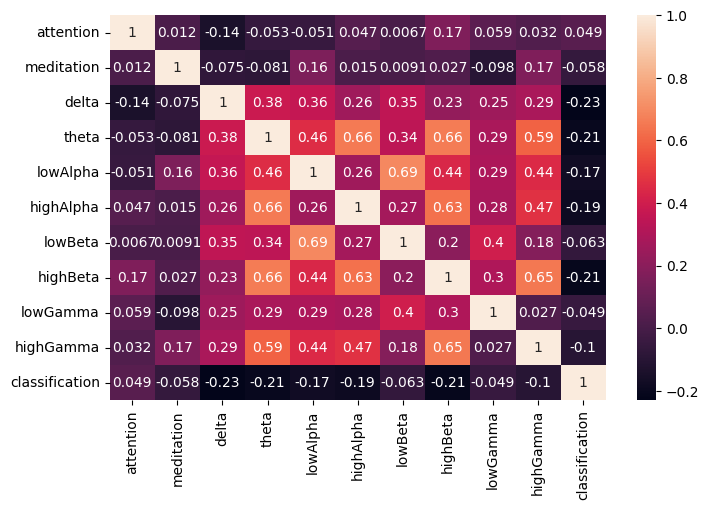

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
#from pandas.profiling import ProfileReport

In [17]:
#profile = ProfileReport(df)
#profile

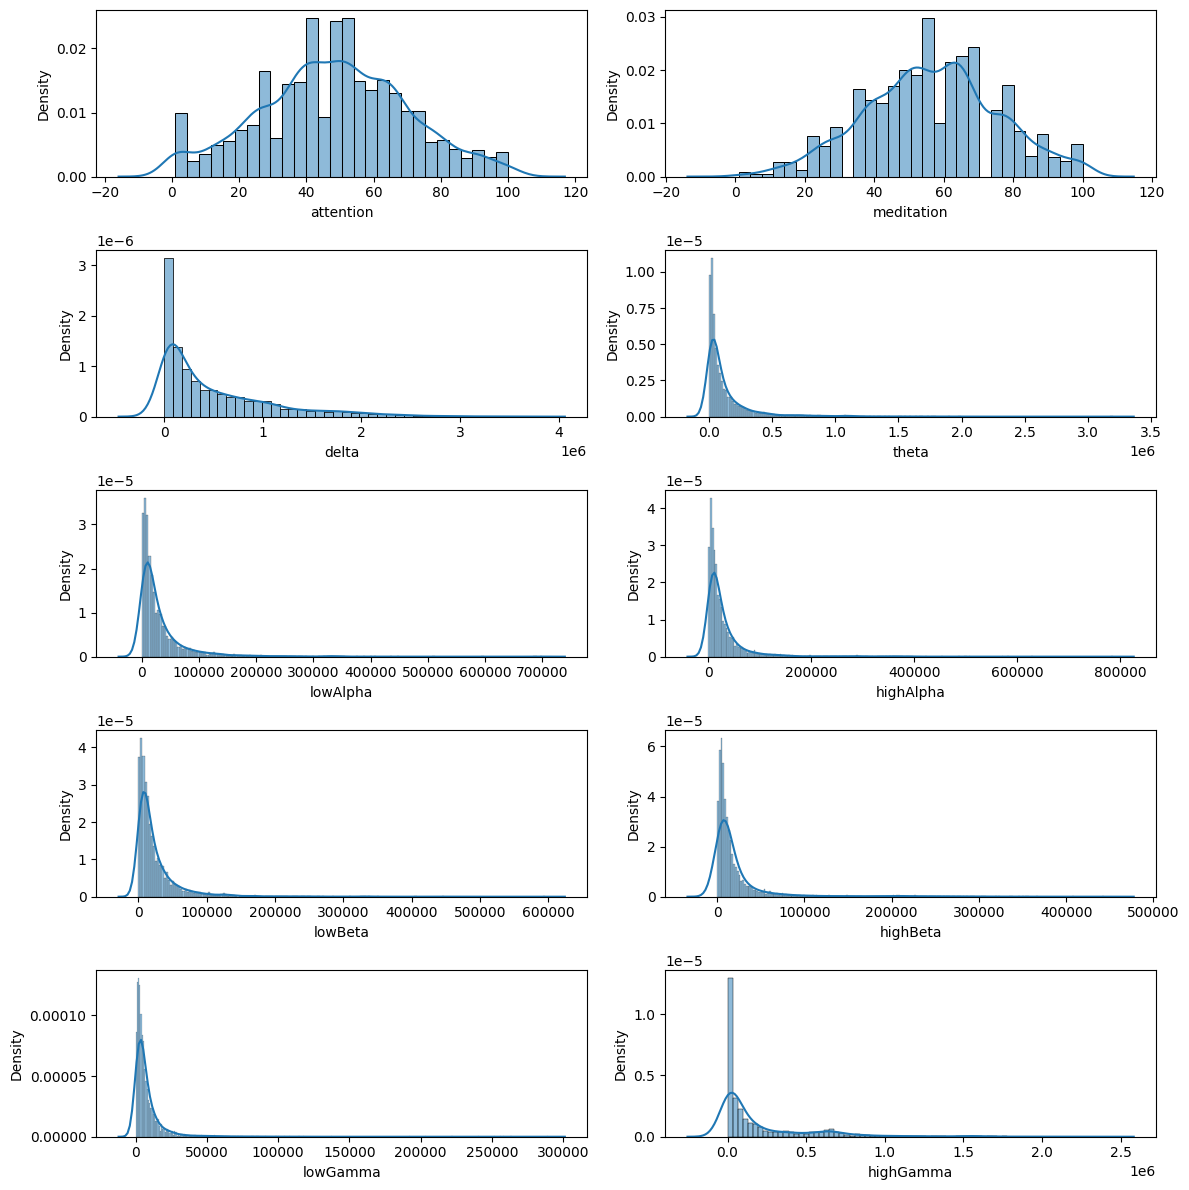

In [18]:
cols = list(df.columns)[0:len(df.columns)-1]
rows_plot = 5
cols_plot = 2
counter = 1
plt.rcParams["figure.figsize"] = [12, 12]
for col in cols:
    plt.subplot(rows_plot, cols_plot, counter)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=4))
    counter += 1
plt.tight_layout()
plt.show()

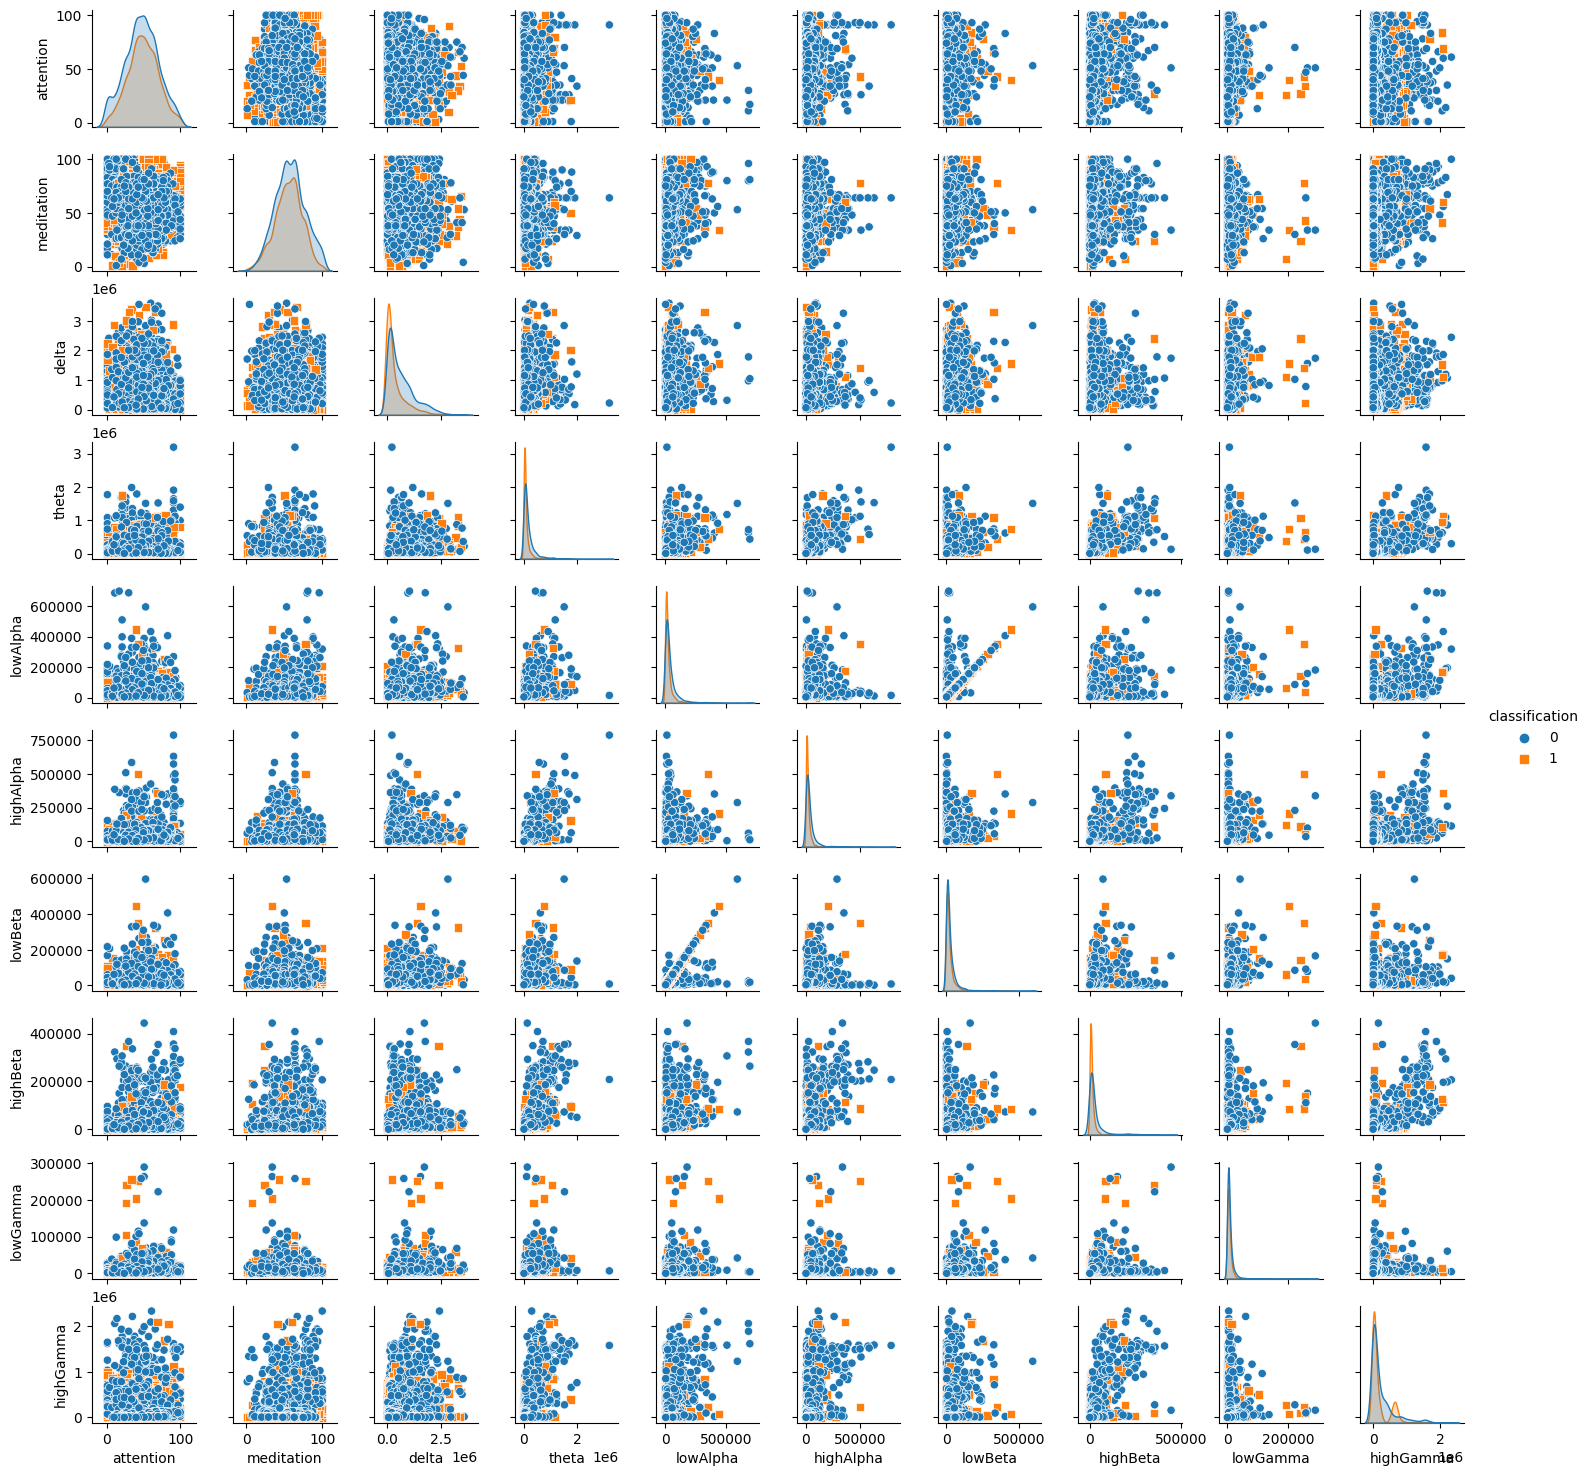

In [20]:
_ = sns.pairplot(df, hue='classification', diag_kind='kde', markers=['o', 's'], height=1.5, aspect=1)

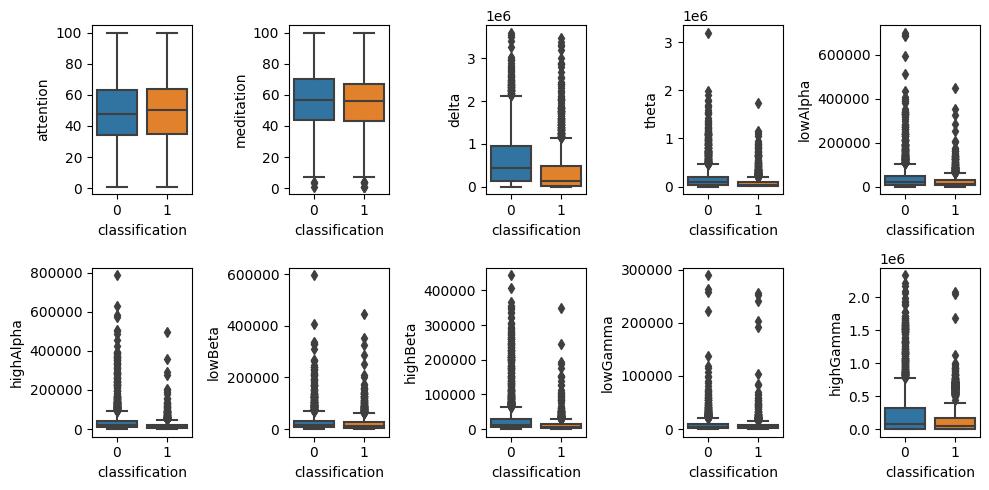

In [21]:
rows_plot=2
cols_plot=5
counter=1
plt.rcParams['figure.figsize']=[10,5]
for col in cols:
    plt.subplot(rows_plot,cols_plot,counter)
    sns.boxplot(x='classification',y=col,data=df)
    counter+=1

plt.tight_layout()
plt.show()

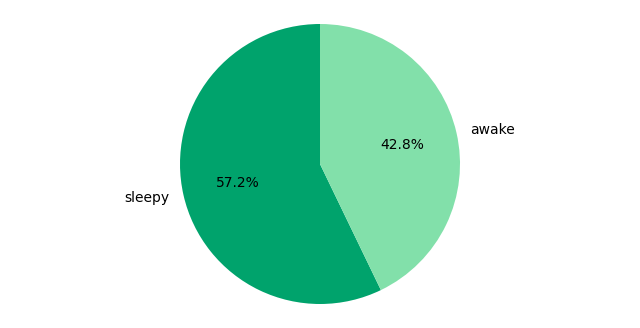

In [22]:
plt.figure(figsize=(8, 4))
plt.pie(df['classification'].value_counts(), labels=['sleepy', 'awake'], autopct='%1.1f%%', startangle=90, colors = ['#00A36C', '#82E0AA'])
plt.axis('equal')
plt.show()

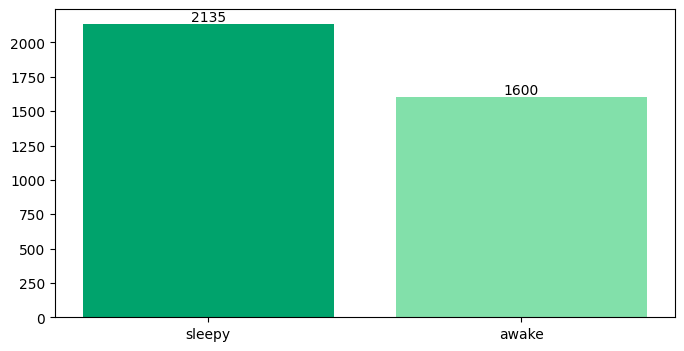

In [23]:
plt.figure(figsize=(8, 4))
ax = plt.gca()
bars = plt.bar(['sleepy', 'awake'], df['classification'].value_counts(), color=['#00A36C', '#82E0AA'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 0),
                textcoords="offset points", ha='center', va='bottom')

Text(0.5, 1.0, 'Sleepy/Awake vs Different Wave Frequency')

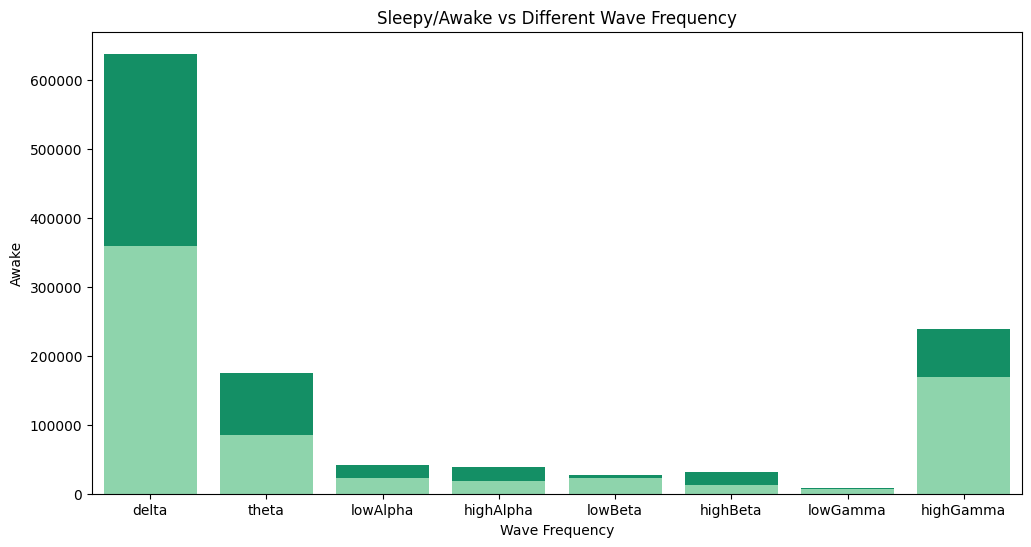

In [24]:
state_means = df.groupby('classification')[['delta', 'theta', 'lowAlpha', 'highAlpha','lowBeta', 'highBeta', 'lowGamma', 'highGamma']].mean()

state_means = state_means.T.reset_index()

state_means.columns = ['Wave Frequency', 'Sleepy', 'Awake']

state_band = ['delta', 'theta', 'lowAlpha', 'highAlpha','lowBeta', 'highBeta', 'lowGamma', 'highGamma']

state_means = state_means[state_means['Wave Frequency'].isin(state_band)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Wave Frequency', y='Sleepy', data=state_means, color='#00A36C', label='Sleepy')
sns.barplot(x='Wave Frequency', y='Awake', data=state_means, color='#82E0AA', label='Awake')
plt.title('Sleepy/Awake vs Different Wave Frequency')

# Inżynieria cech

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


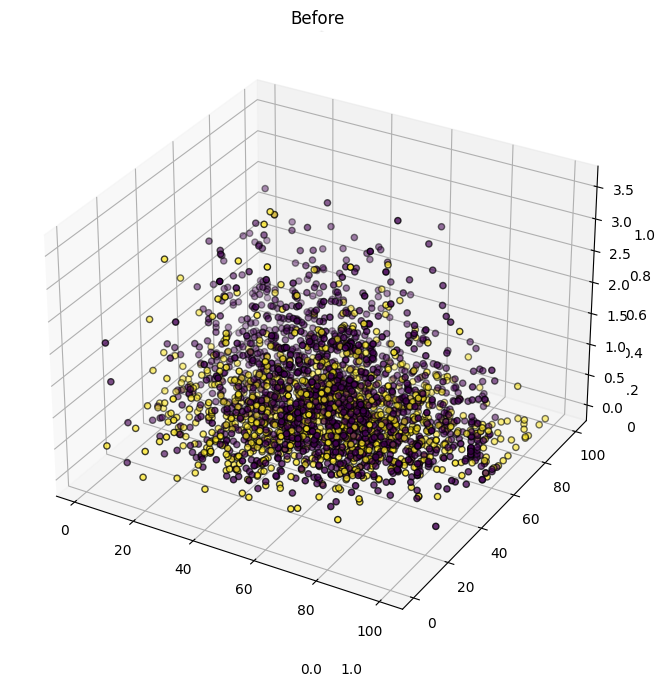

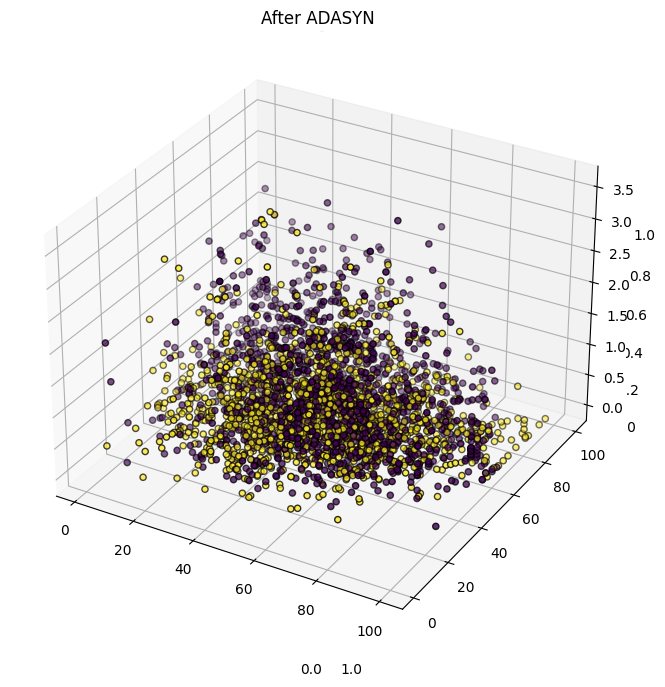

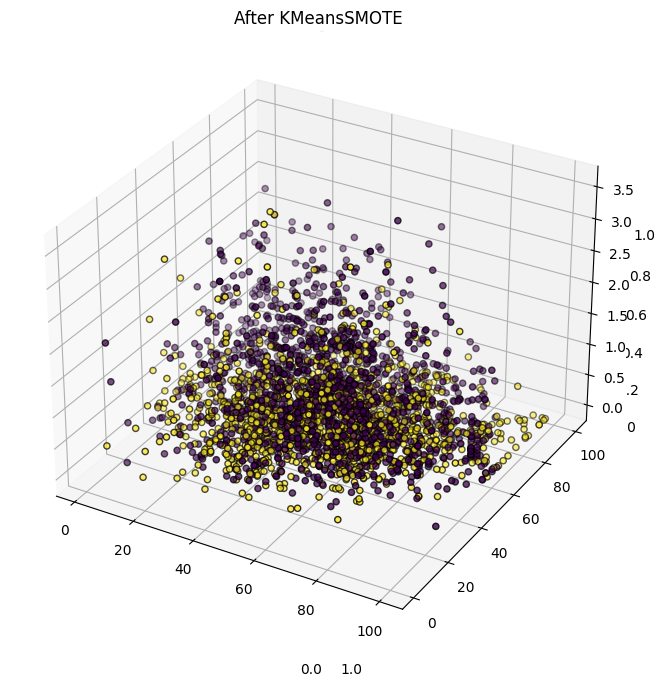

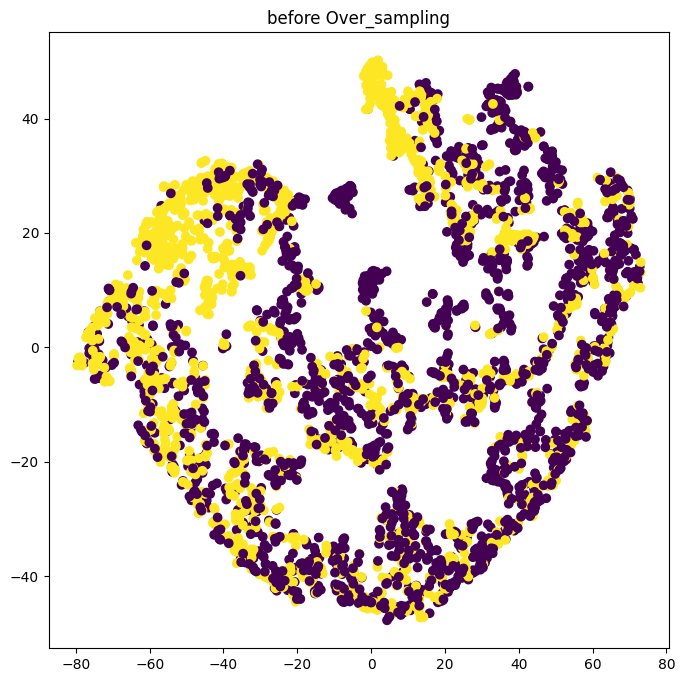

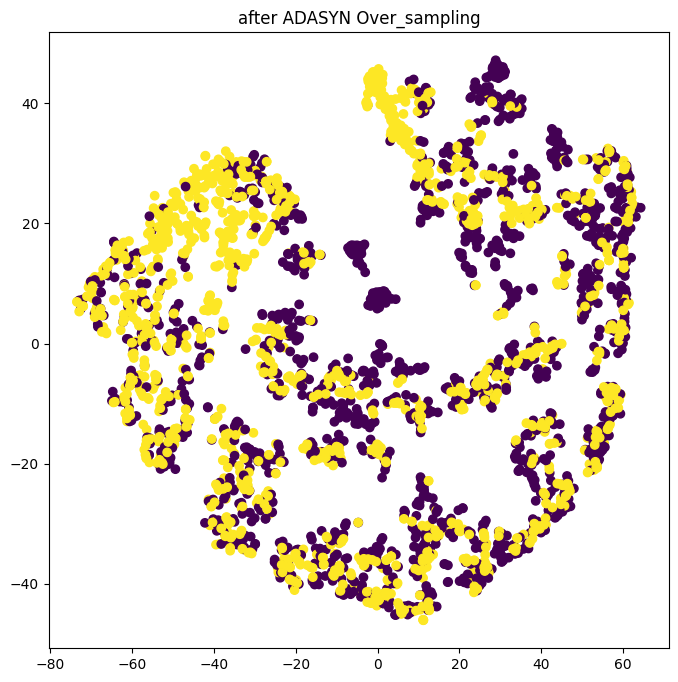

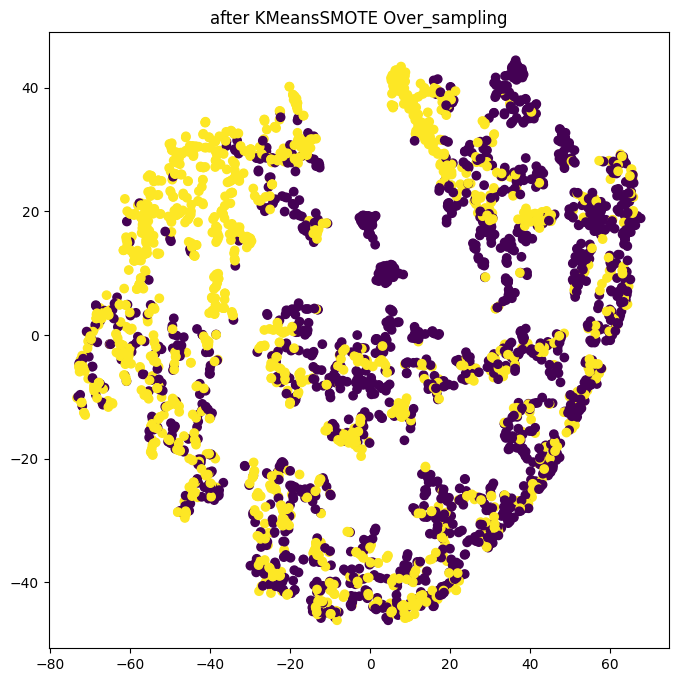

In [73]:
ada = ADASYN(sampling_strategy='minority', random_state=42)
km = KMeansSMOTE(random_state=42)

X = df.drop(columns = ['classification'])
y = df['classification']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, stratify=y_trainval, random_state=42)

X_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)
X_train_km, y_train_km = km.fit_resample(X_train,y_train)

Plot_3D(X_train,y_train,0,1,2,str("Before"))
Plot_3D(X_train_ada,y_train_ada,0,1,2,str("After ADASYN"))
Plot_3D(X_train_km,y_train_km,0,1,2,str("After KMeansSMOTE"))
Feature_2D(X,y,str("before Over_sampling"))
Feature_2D(X_train_ada,y_train_ada,str("after ADASYN Over_sampling"))
Feature_2D(X_train_km,y_train_km,str("after KMeansSMOTE Over_sampling"))

# KNN

In [38]:
params = {"n_neighbors": [3,5,7,9,11],
          "algorithm": ["ball_tree","kd_tree","brute"],
          "leaf_size": [15,30,45],
          "p": [1,2]}

gs_km = GridSearchCV(KNeighborsClassifier(),
                  param_grid=params,
                  cv=10,
                  scoring="f1_macro")

gs_km.fit(X_train_km,y_train_km)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 30, 45],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]},
             scoring='f1_macro')

Accuracy score: 0.6918238993710691
Precision score: 0.6266666666666667
Recall score: 0.6911764705882353
matt_score: 0.38006012860791655
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       273
           1       0.63      0.69      0.66       204

    accuracy                           0.69       477
   macro avg       0.69      0.69      0.69       477
weighted avg       0.70      0.69      0.69       477



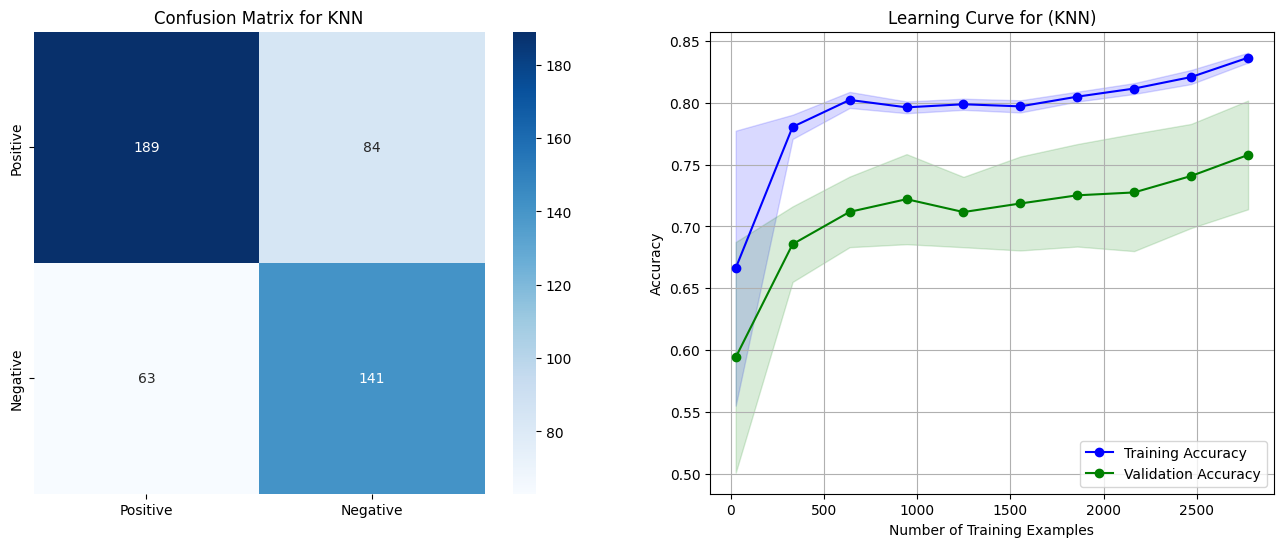

In [41]:
model_kn = KNeighborsClassifier(n_neighbors=gs_km.best_params_["n_neighbors"],
                                algorithm=gs_km.best_params_["algorithm"],
                                leaf_size=gs_km.best_params_["leaf_size"],
                                p=gs_km.best_params_["p"])

model_kn.fit(X_train_km, y_train_km)

y_pred_kn = model_kn.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_kn)}")
print(f"Precision score: {precision_score(y_val,y_pred_kn)}")
print(f"Recall score: {recall_score(y_val,y_pred_kn)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_kn)}")
matrix_kn = confusion_matrix(y_val,y_pred_kn)

print(classification_report(y_val,y_pred_kn))

Matrix_Curve(model_kn,X_train_km,y_train_km,KNN,matrix_kn)

# 2 Model

Accuracy score: 0.639412997903564
Precision score: 0.5533333333333333
Recall score: 0.8137254901960784
matt_score: 0.33066964227680345
              precision    recall  f1-score   support

           0       0.79      0.51      0.62       273
           1       0.55      0.81      0.66       204

    accuracy                           0.64       477
   macro avg       0.67      0.66      0.64       477
weighted avg       0.69      0.64      0.64       477



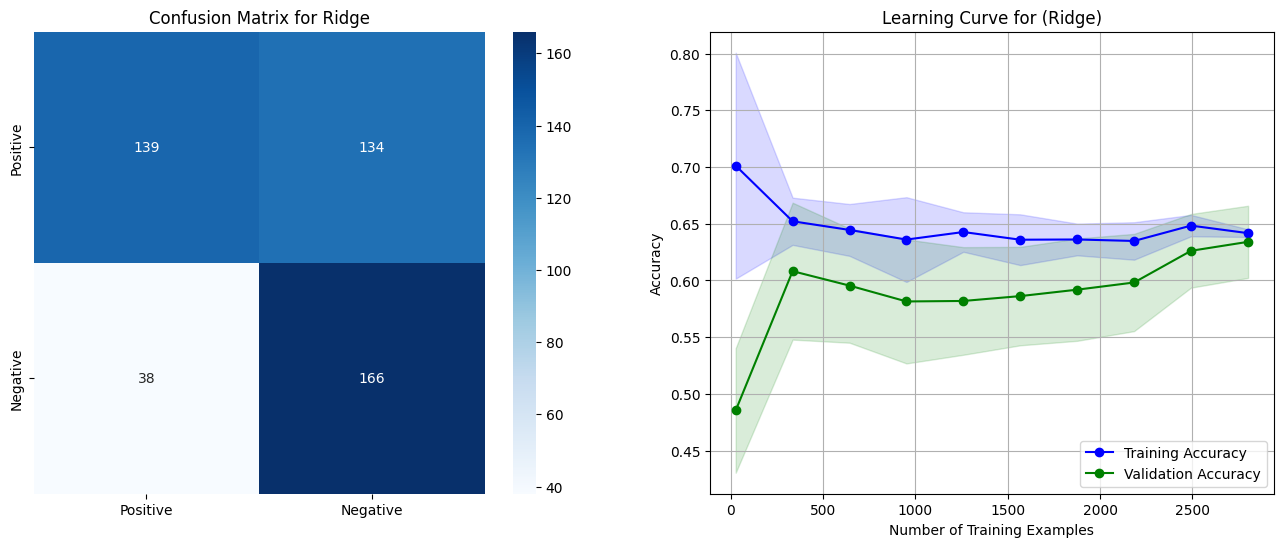

In [77]:
from sklearn.linear_model import RidgeClassifier

model_ridge = RidgeClassifier()

model_ridge.fit(X_train_ada,y_train_ada)

y_pred_ridge = model_ridge.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_ridge)}")
print(f"Precision score: {precision_score(y_val,y_pred_ridge)}")
print(f"Recall score: {recall_score(y_val,y_pred_ridge)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_ridge)}")
matrix_ridge = confusion_matrix(y_val,y_pred_ridge)

print(classification_report(y_val,y_pred_ridge))

Matrix_Curve(model_ridge,X_train_ada,y_train_ada,str("Ridge"),matrix_ridge)

# Random Forest

In [43]:
params_rf = {"n_estimators": [150,250],
          "criterion": ["gini","entropy"],
          "max_depth": [25,35],
          "min_samples_split": [5,15],
          "min_samples_leaf": [5,15]}

gs_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                  param_grid=params_rf,
                  cv=10,
                  scoring="f1_macro",
                  verbose=2)

gs_rf.fit(X_train_ada,y_train_ada)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.8s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.6s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.2s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.2s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.2s
[

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 35], 'min_samples_leaf': [5, 15],
                         'min_samples_split': [5, 15],
                         'n_estimators': [150, 250]},
             scoring='f1_macro', verbose=2)

In [44]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 250}

Accuracy score: 0.7651991614255765
Precision score: 0.7
Recall score: 0.7892156862745098
matt_score: 0.5311634526412982
              precision    recall  f1-score   support

           0       0.83      0.75      0.78       273
           1       0.70      0.79      0.74       204

    accuracy                           0.77       477
   macro avg       0.76      0.77      0.76       477
weighted avg       0.77      0.77      0.77       477



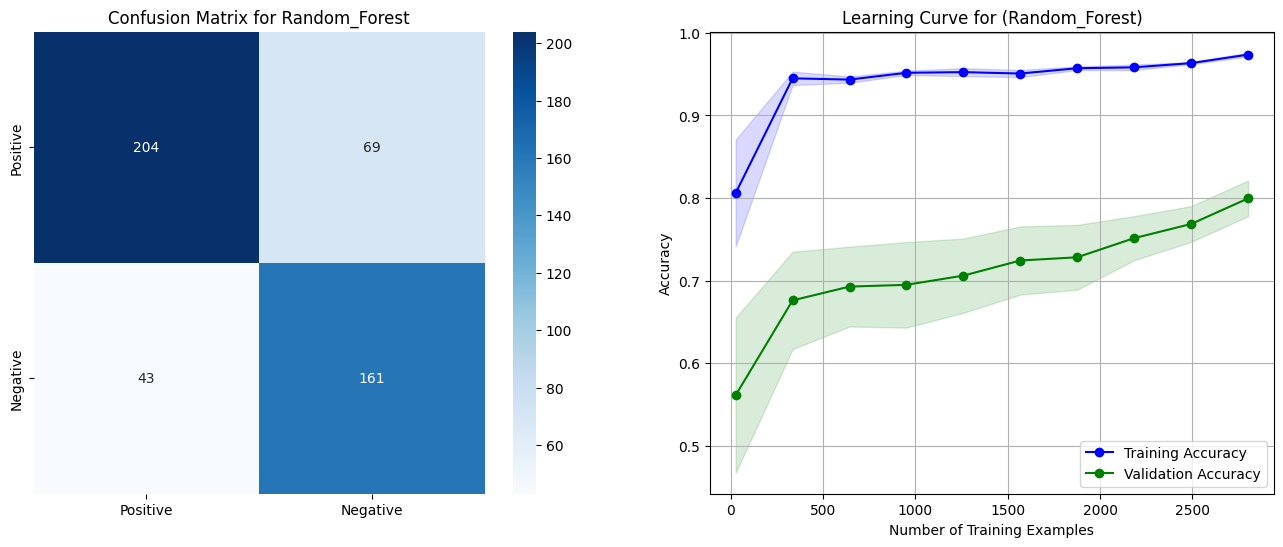

In [49]:
model_rf = RandomForestClassifier(criterion=gs_rf.best_params_['criterion'],
                                  max_depth=gs_rf.best_params_['max_depth'],
                                  min_samples_leaf=gs_rf.best_params_['min_samples_leaf'],
                                  min_samples_split=gs_rf.best_params_['min_samples_split'],
                                  n_estimators=gs_rf.best_params_['n_estimators'],
                                  random_state=42)

model_rf.fit(X_train_ada, y_train_ada)

y_pred_rf = model_rf.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_rf)}")
print(f"Precision score: {precision_score(y_val,y_pred_rf)}")
print(f"Recall score: {recall_score(y_val,y_pred_rf)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_rf)}")
matrix_rf = confusion_matrix(y_val,y_pred_rf)

print(classification_report(y_val,y_pred_rf))

Matrix_Curve(model_rf,X_train_ada,y_train_ada,str("Random_Forest"),matrix_rf)

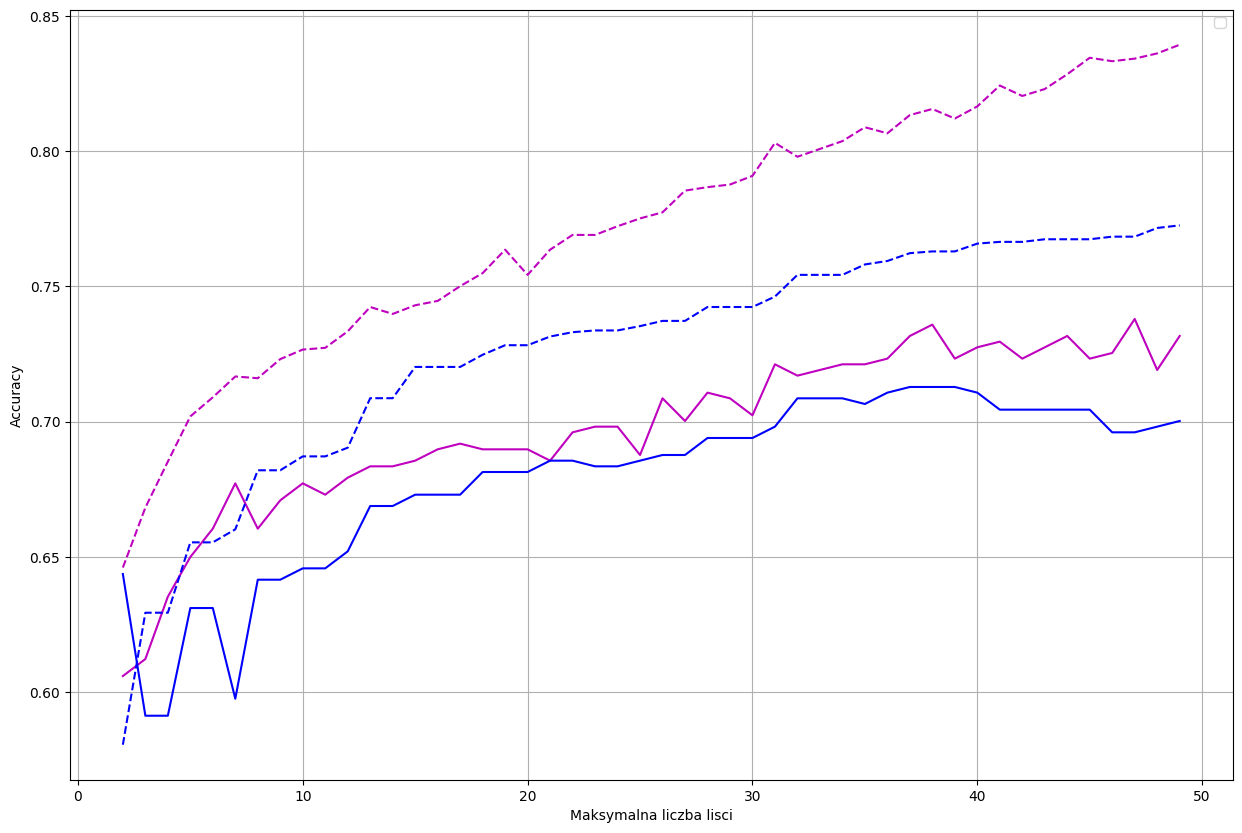

In [67]:
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,50,1):
    tree_1_classifier = DecisionTreeClassifier(max_leaf_nodes=i,
                                               criterion='entropy',
                                               max_depth=25).fit(X_train_ada,y_train_ada)
    tree_train_scores.append(tree_1_classifier.score(X_train_ada,y_train_ada))
    tree_test_scores.append(tree_1_classifier.score(X_val,y_val))

    rf_1_classifier = RandomForestClassifier(max_leaf_nodes=i,
                                               criterion='entropy',
                                               max_depth=25,
                                               n_estimators=250).fit(X_train_ada,y_train_ada)
    rf_train_scores.append(rf_1_classifier.score(X_train_ada,y_train_ada))
    rf_test_scores.append(rf_1_classifier.score(X_val,y_val))

plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna liczba lisci')
plt.ylabel('Accuracy')

plt.plot(range(2,50,1), rf_train_scores,'m--')
plt.plot(range(2,50,1), rf_test_scores, 'm')
plt.plot(range(2,50,1), tree_train_scores, 'b--')
plt.plot(range(2,50,1), tree_test_scores, 'b')
plt.legend(loc="best")
plt.grid()
plt.show()

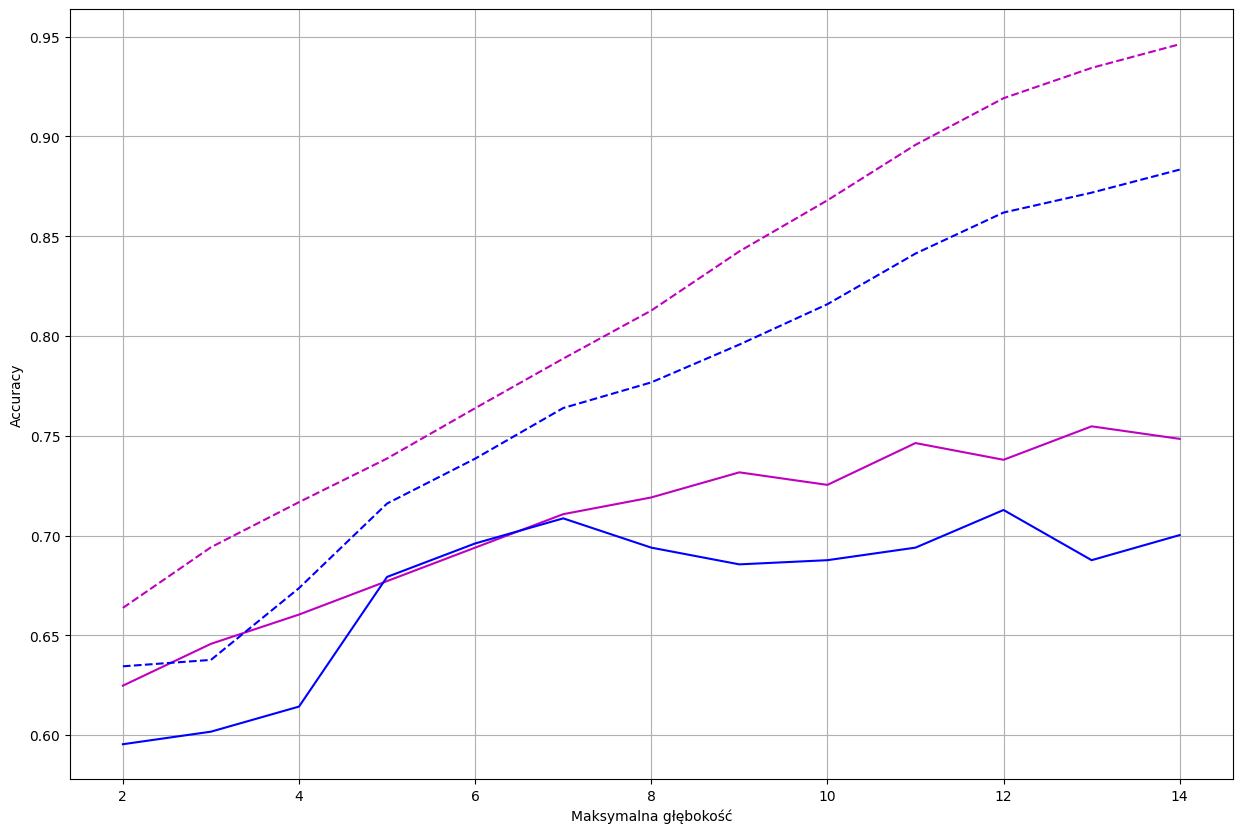

In [68]:
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,15,1):
    tree_1_classifier = DecisionTreeClassifier(max_depth=i,
                                               criterion="entropy",
                                               min_samples_split=5,
                                               min_samples_leaf=5).fit(X_train_ada,y_train_ada)
    tree_train_scores.append(tree_1_classifier.score(X_train_ada,y_train_ada))
    tree_test_scores.append(tree_1_classifier.score(X_val,y_val))

    rf_1_classifier = RandomForestClassifier(max_depth=i,
                                             criterion="entropy",
                                             min_samples_split=5,
                                             min_samples_leaf=5,
                                             n_estimators=250).fit(X_train_ada,y_train_ada)
    rf_train_scores.append(rf_1_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_1_classifier.score(X_val,y_val))

plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna głębokość')
plt.ylabel('Accuracy')

plt.plot(range(2,15,1), rf_train_scores,'m--')
plt.plot(range(2,15,1), rf_test_scores, 'm')
plt.plot(range(2,15,1), tree_train_scores, 'b--')
plt.plot(range(2,15,1), tree_test_scores, 'b')
plt.grid()
plt.show()

0.9979194634197086
0.8397795015442076


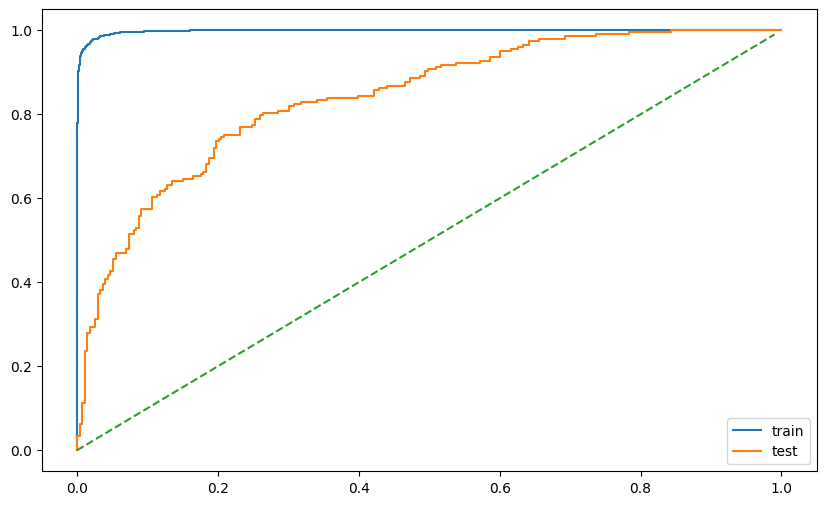

In [74]:
pred_train_proba = model_rf.predict_proba(X_train_ada)[:,1]
pred_test_proba = model_rf.predict_proba(X_val)[:,1]

print(roc_auc_score(y_train_ada,pred_train_proba))
print(roc_auc_score(y_val,pred_test_proba))

fpr_train, tpr_train, thresholds =roc_curve(y_train_ada, pred_train_proba)
fpr_test, tpr_test, thresholds_test =roc_curve(y_val, pred_test_proba)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(fpr_train,tpr_train, label='train')
plt.plot(fpr_test,tpr_test,label='test')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.legend()
plt.show()

## Podsumowanie

In [ ]:
# result = pd.concat([df_lr,df_kn, df_tree, df_rf, df_svm])
# result

In [ ]:
# print("Projekt końcowy")